In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df=pd.read_csv("/content/Q3_winequalityN.csv")

In [138]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


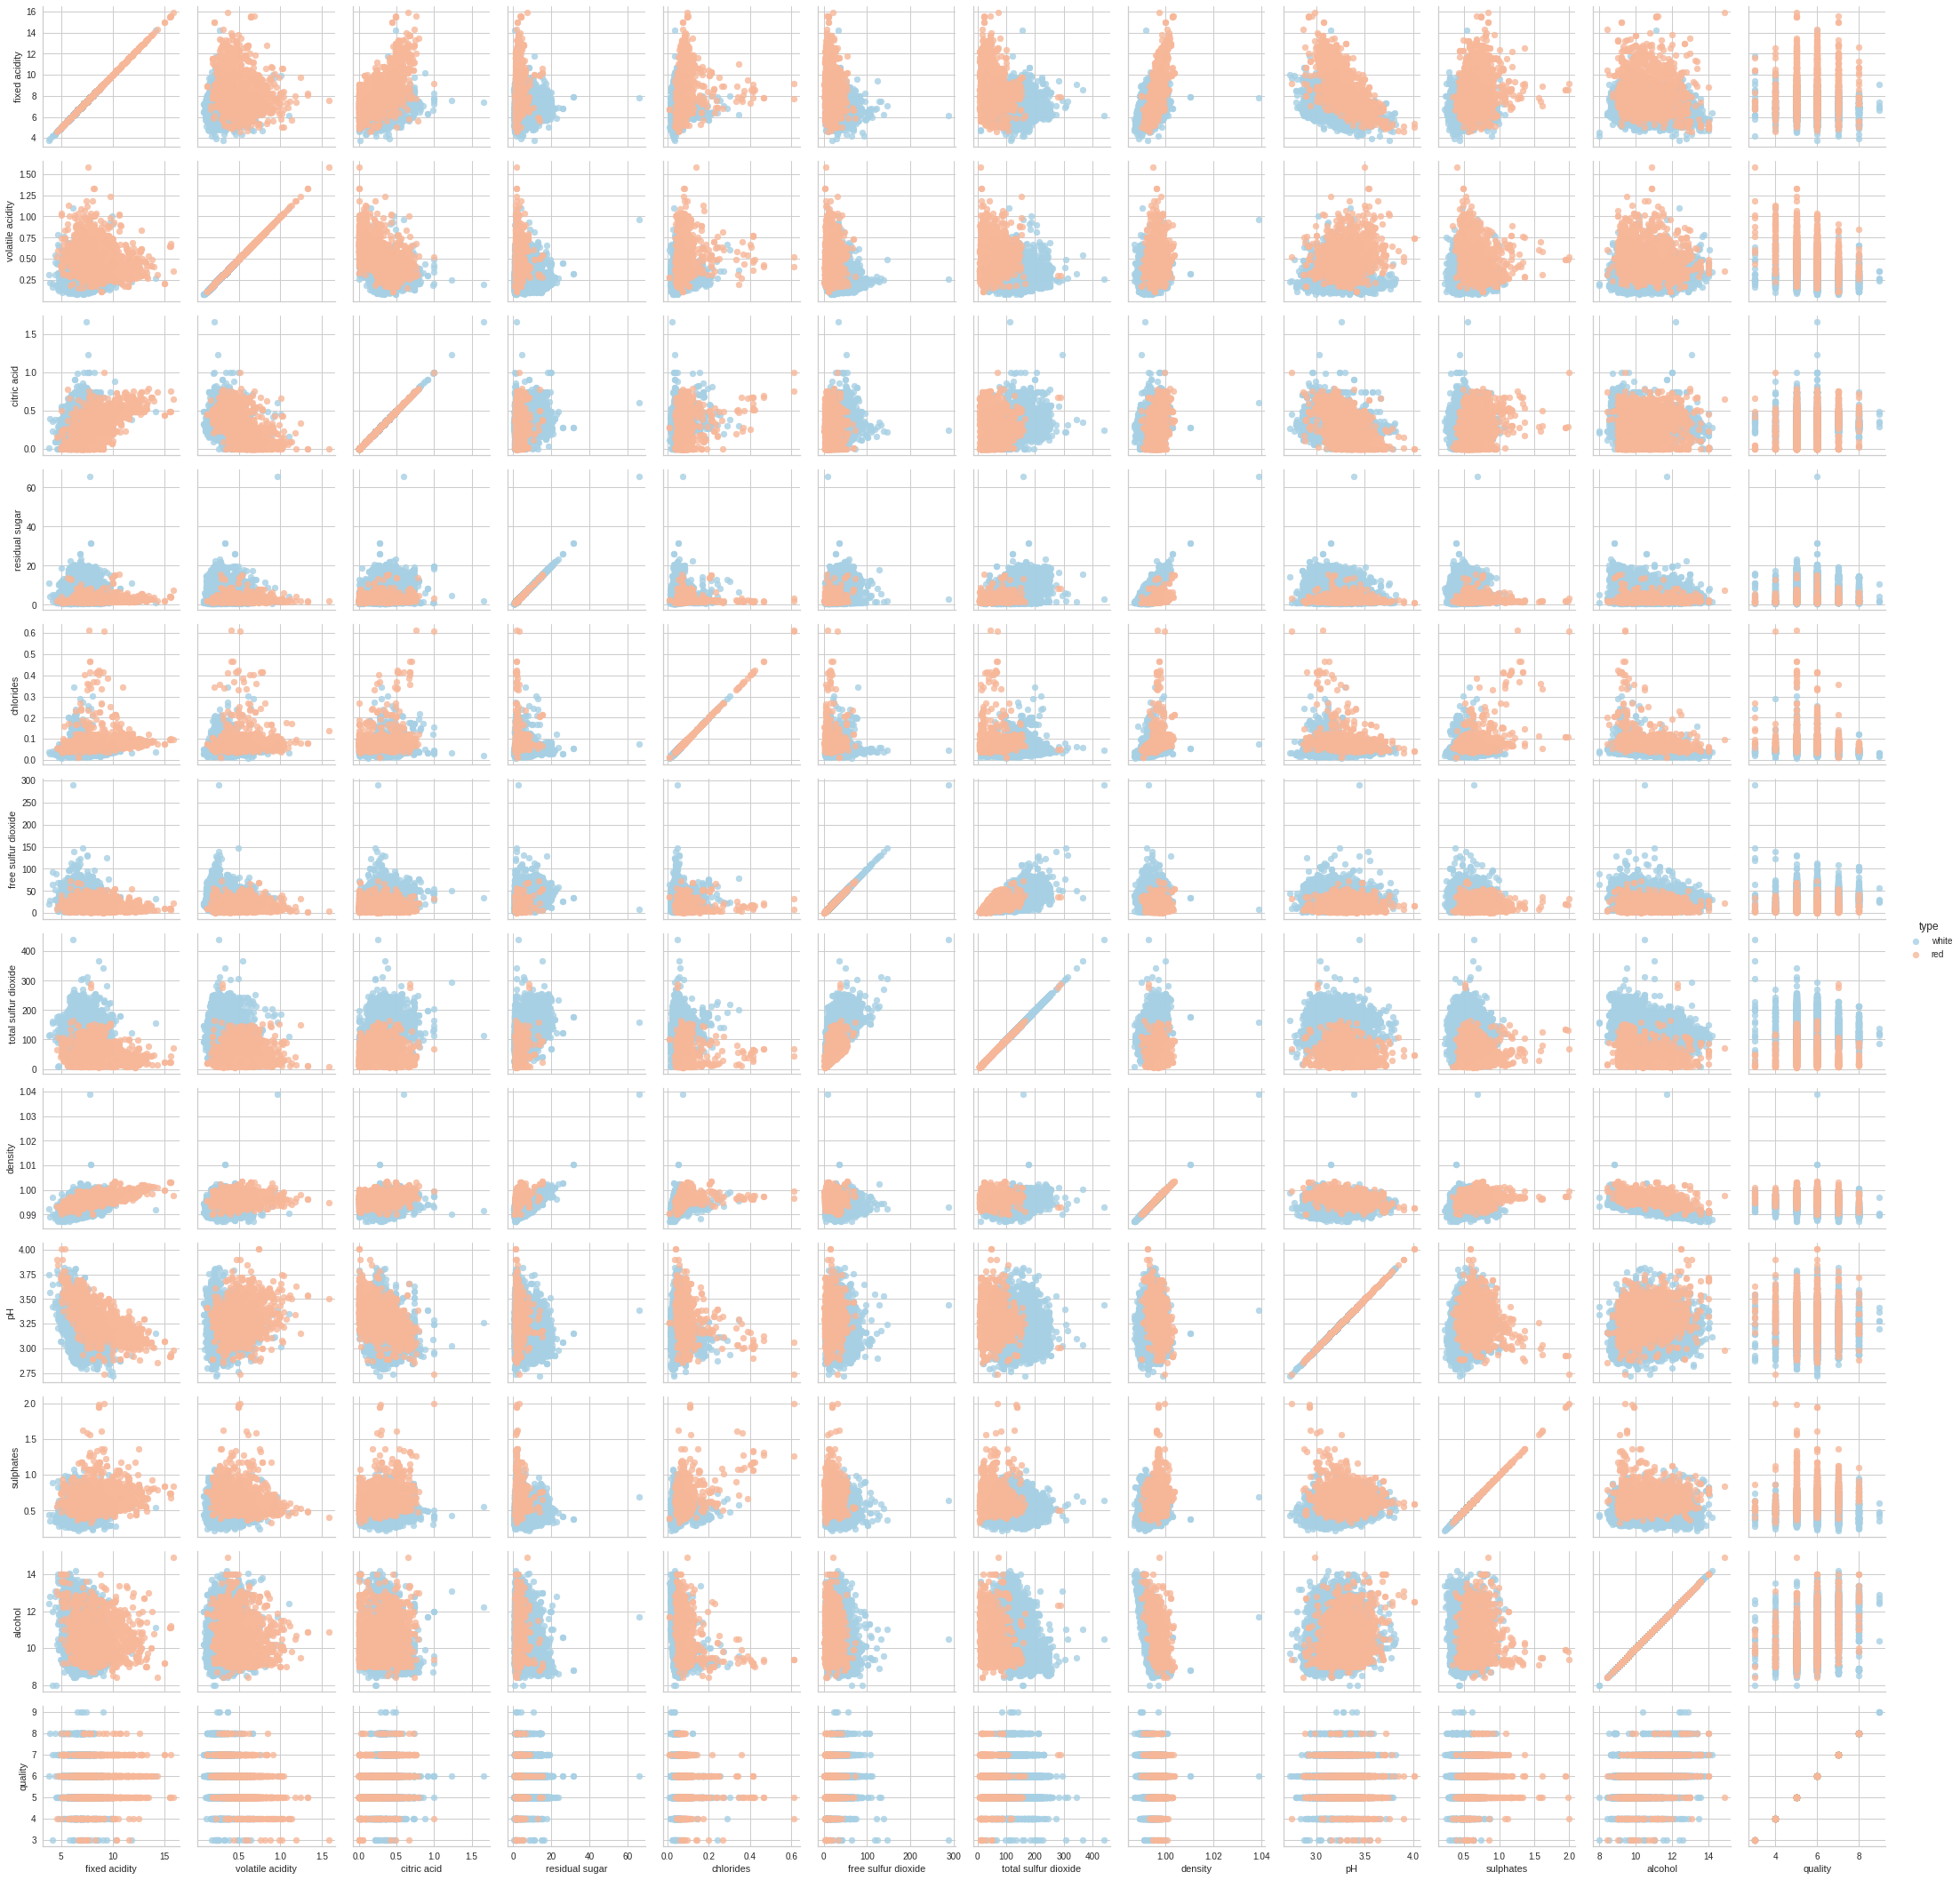

In [139]:
g = sns.PairGrid(df,
                 hue='type', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# Handeling missing values

In [140]:
df.isna().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [141]:
df=df.dropna()

In [142]:
from sklearn.model_selection import train_test_split
y=labels.replace('white', '0')
y=y.replace('red', '1')
X_train, X_test, y_train, y_test = train_test_split(Normalized_Dataset, y, random_state=42)

# Without Library

In [143]:
class SequentialForwardSelection():
     
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
    def fit(self, X_train, X_test, y_train, y_test):
        max_indices = tuple(range(X_train.shape[1]))
        total_features_count = len(max_indices)
        self.subsets_ = []
        self.scores_ = []
        self.indices_ = []
        scores = []
        subsets = []
        for p in combinations(max_indices, r=1):
                score = self._calc_score(X_train.values, X_test.values, y_train.values, y_test.values, p)
                scores.append(score)
                subsets.append(p)
        best_score_index = np.argmax(scores)
        self.scores_.append(scores[best_score_index])
        self.indices_ = list(subsets[best_score_index])
        self.subsets_.append(self.indices_)

        dim = 1
        while dim < self.k_features:
            scores = []
            subsets = []
            current_feature = dim
            idx = 0
            while idx < total_features_count:
                if idx not in self.indices_:
                    indices = list(self.indices_)
                    indices.append(idx)
                    score = self._calc_score(X_train.values, X_test.values, y_train.values, y_test.values,indices)
                    scores.append(score)
                    subsets.append(indices)
                idx += 1
            best_score_index = np.argmax(scores)
            self.scores_.append(scores[best_score_index])
            self.indices_ = list(subsets[best_score_index])
            self.subsets_.append(self.indices_)
             
            dim += 1
             
        self.k_score_ = self.scores_[-1]

    def transform(self, X):
        return X.values[:, self.indices_],self.indices_
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = accuracy_score(y_test, y_pred)
        return score

In [144]:
clf = RandomForestClassifier( random_state=0)
forwardsfs = SequentialForwardSelection(clf, 2)
forwardsfs.fit(X_train, X_test, y_train, y_test)

In [145]:
X_train_transform,features=forwardsfs.transform(X_train)

In [146]:
feature_names[features]

Index(['total sulfur dioxide', 'chlorides'], dtype='object')

# Using Sklearn

## Forward

In [147]:
rbf_svc = svm.SVC(kernel='rbf')
forwardsfs = sfs(rbf_svc, n_features_to_select=2,direction='forward')
forwardsfs.fit(X_train, y_train)
print("Features selected by backward sequential selection: "f"{feature_names[forwardsfs.get_support()]}")

Features selected by backward sequential selection: Index(['chlorides', 'total sulfur dioxide'], dtype='object')


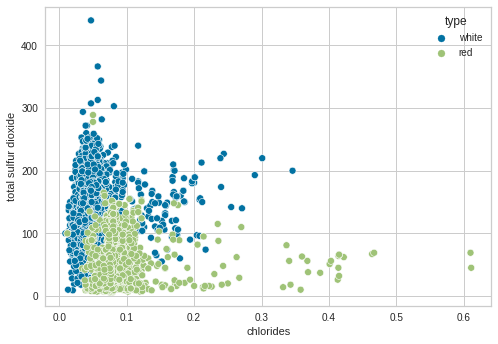

In [148]:
sns.scatterplot(data=df, x=feature_names[forwardsfs.get_support()][0], y=feature_names[forwardsfs.get_support()][1], hue=labels)

In [167]:
from sklearn.metrics import accuracy_score,log_loss
accuracy=[]
loss=[]
for i in range(1,12):
  indexes=np.arange(0,12)
  rbf_svc = svm.SVC(kernel='rbf')
  forwardsfs = sfs(rbf_svc, n_features_to_select=i,direction='forward')
  forwardsfs.fit(X_train, y_train)
  indexes=indexes[forwardsfs.get_support()]
  rbf_svc.fit(X_train[indexes],y_train)
  y_pred = rbf_svc.predict(X_test[indexes])
  accuracy.append(accuracy_score(y_test,y_pred))
  loss.append(log_loss(y_test , y_pred))

Text(0, 0.5, 'Accuracy')

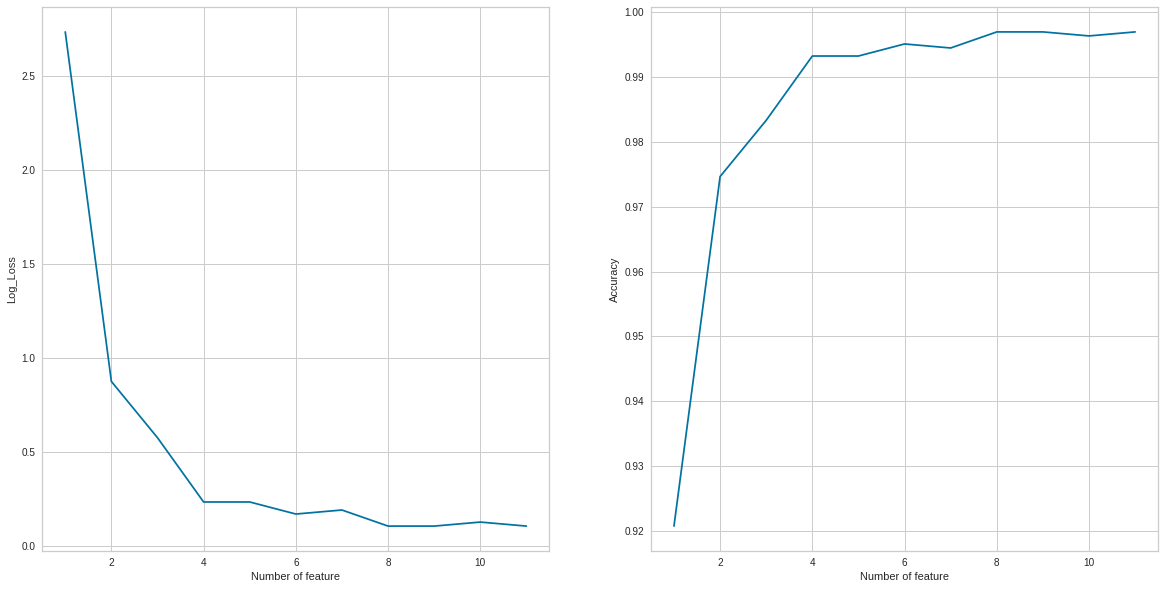

In [168]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].plot(range(1,len(X_train.columns)),loss )
ax[0].set_xlabel('Number of feature')
ax[0].set_ylabel('Log_Loss')
ax[1].plot(range(1,len(X_train.columns)),accuracy)
ax[1].set_xlabel('Number of feature')
ax[1].set_ylabel('Accuracy')

## Backward

In [154]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
from sklearn import preprocessing

In [155]:
labels=df["type"]
df=df.drop("type",axis=1)

In [156]:
feature_names=df.columns

In [157]:
# Normalizing data
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Normalized_Dataset = pd.DataFrame(x_scaled)

In [158]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [159]:
clf = RandomForestClassifier( random_state=0)
selector = RFE(clf, n_features_to_select=2, step=1)
selector = selector.fit(X_train, y_train)

In [160]:
print("Features selected by backward sequential selection: "f"{feature_names[selector.support_]}")

Features selected by backward sequential selection: Index(['chlorides', 'total sulfur dioxide'], dtype='object')


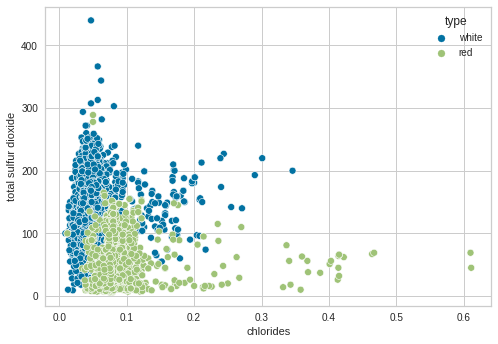

In [161]:
sns.scatterplot(data=df, x=feature_names[selector.support_][0], y=feature_names[selector.support_][1], hue=labels)

In [162]:
from sklearn.metrics import accuracy_score,log_loss
accuracy=[]
loss=[]
for i in range(1,12):
  indexes=np.arange(0,12)
  clf = RandomForestClassifier( random_state=0)
  selector = RFE(clf, n_features_to_select=i)
  selector = selector.fit(Normalized_Dataset, labels.values)
  indexes=indexes[selector.support_]
  clf.fit(X_train[indexes],y_train)
  y_pred = clf.predict(X_test[indexes])
  accuracy.append(accuracy_score(y_test,y_pred))
  loss.append(log_loss(y_test , y_pred))

Text(0, 0.5, 'Accuracy')

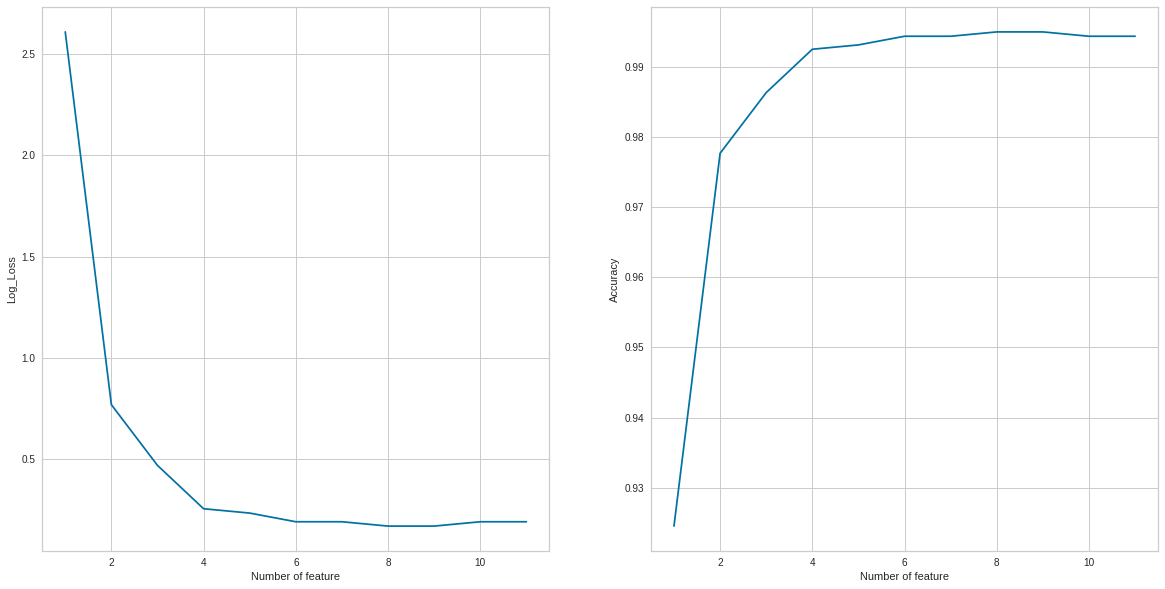

In [166]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].plot(range(1,len(X_train.columns)),loss)
ax[0].set_xlabel('Number of feature')
ax[0].set_ylabel('Log_Loss')
ax[1].plot(range(1,len(X_train.columns)),accuracy)
ax[1].set_xlabel('Number of feature')
ax[1].set_ylabel('Accuracy')